# Investigation of different parameterizations of w(x)
In this notebook I investigate the inpact different parametrizations has on w(x) presented by Peters et al. (2020)

\begin{align}
w(x) &= \frac{\hat{p}(x) + \varepsilon[\hat{p}(x)]}{\int_{-\infty}^\infty \hat{p}(s) + \varepsilon[\hat{p}(s)] ds}  \\ \\
     &  = \frac{\frac{n(x)}{T} + \sqrt{\frac{n(x)}{T^2}}}{\int_{-\infty}^\infty \frac{n(s)}{T} + \sqrt{\frac{n(s)}{T^2}} ds}
\end{align}

I investigate multiple different parameterizations, but would like to end up with one that (as CPT) has two parameters: 
- a sensitivity parameter; and 
- a elevation parameter

In [3]:
# %matplotlib notebook
# from ipywidgets import *
import math
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def we(n,T,par="none", delta=1,gamma=1):
    n2 = T-n
    if par=="1":
        n = n*delta
        n2 = n2*delta
    elif par=="2":
        n=n*delta
        n2=n2*delta
        T=T*gamma
    #Estimating w for outcome 
    p =  n/T
    error = math.sqrt(p/T)
    
    if par=="3":
        p = p*delta
        error = error*gamma
    
    w = p+error
    
    #Estimating w for 1-outcome
    p2 = n2/T
    error2 = math.sqrt(p2/T)
    
    if par=="3":
        p2 = p2
        error2 = delta*error2**gamma
    
    w2 = p2 + error2
    
    #Normalizing
    w_norm = w/(w+w2)
    w2_norm = w2/(w+w2)
#     print(w_norm)
#     print(w2_norm)

    return w_norm, p, error2

In [52]:
def we(n,T,delta,gamma):
    n2 = T-n
    
    #Setting params
    p = n/T
    error = math.sqrt(p/T)
    
    p2 = n2/T
    error2 = math.sqrt(p2/T)
    
    #introducing the parameters
    p = p
    p2 = p2
    
    error = delta*error**gamma
    error2 = delta*error2**gamma
    
#     Calculating w 
    w = p + error
    
    w2 = p2 + error2
    
    #Normalizing
    w_norm = w/(w+w2)
    w2_norm = w2/(w+w2)
    
    return w_norm, p, error, w, w2

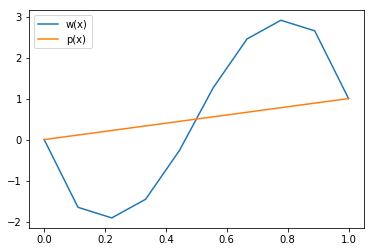

In [61]:
T = 10
N = 10
delta = 1
x = np.linspace(0,T,N)
x1 = np.linspace(0,1,N)
weight = []
p = []
w = []
w2 = []
error = []
for n in x:
    w_tmp, p_tmp, error_tmp, wn_tmp, w2_tmp = we(n,T,delta=-1, gamma=0.5)
    weight.append(w_tmp)
    p.append(p_tmp)
    error.append(error_tmp)
    w.append(wn_tmp)
    w2.append(w2_tmp)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x1, weight, label='w(x)')
line, = ax.plot(x1, x1, label='p(x)')
ax.legend()
plt.show()

In [59]:
error

[0.0,
 5.4982796571508215e-11,
 2.0923498523387143e-09,
 1.758382742371335e-08,
 7.96235946072349e-08,
 2.5693268075418474e-07,
 6.691460058003164e-07,
 1.5031126698542526e-06,
 3.030046247328515e-06,
 5.623413251903492e-06]

In [55]:
w2

[1.1778279410038923,
 1.0516818445104315,
 0.9250570562697152,
 0.797865978084362,
 0.6699870635503955,
 0.5412417149931747,
 0.41134491064402384,
 0.27977822364691884,
 0.1453341143137891,
 0.0]

In [48]:
1.1778279410038923 / (1.1778279410038923+0.07498942093324559)

0.9401433734784015